In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
with np.load('mnist.npz', allow_pickle=True) as f: 
    train_x, train_y = f['x_train'], f['y_train']
    test_x, test_y = f['x_test'], f['y_test']
print(train_x.shape, train_y.shape)

(60000, 28, 28) (60000,)


label is 4


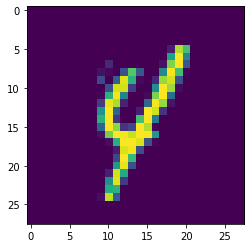

In [ ]:
index = 3457
print('label is %d' % train_y[index])
plt.imshow(train_x[index])
plt.show()

In [ ]:
np.min(train_x[index]), np.max(train_x[index]), np.mean(train_x[index])

(0, 255, 19.855867346938776)

In [3]:
train_x_1 = train_x.reshape(len(train_x), -1)
print(train_x_1.shape)

test_x_1 = test_x.reshape(len(test_x), -1)
print(test_x_1.shape)

(60000, 784)
(10000, 784)


In [ ]:
class DummyClassifier(object):
    def __init__(self):
        self.name = 'Dummy'
    def fit(self, train_x, train_y):
        pass
    def predict(self, test_x):
        return np.random.randint(low=0, high=10, size=len(test_x))
    
    

In [ ]:
classifier = DummyClassifier()
classifier.fit(train_x_1, train_y)
pred = classifier.predict(test_x_1)

In [ ]:
def accuracy(pred, gt):
    return np.sum(pred == gt)/len(gt)

In [ ]:
acc = accuracy(pred, test_y)
print(acc)

0.1101


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(pred, test_y)

0.1101

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
results = []
for k in range(1,10, 2):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_x_1[:2000], train_y[:2000])
    pred = classifier.predict(test_x_1[:100])
    acc = accuracy_score(pred, test_y[:100])
    results.append(acc)
    print(k, acc)

1 0.86
3 0.9
5 0.9
7 0.89
9 0.9


In [ ]:
results = []
for k in range(1,10, 2):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_x_1[:3000], train_y[:3000])
    pred = classifier.predict(test_x_1[:100])
    acc = accuracy_score(pred, test_y[:100])
    results.append(acc)
    print(k, acc)

1 0.89
3 0.94
5 0.93
7 0.9
9 0.9


In [ ]:
results = []
for k in range(1,10, 2):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_x_1[:10000], train_y[:10000])
    pred = classifier.predict(test_x_1[:100])
    acc = accuracy_score(pred, test_y[:100])
    results.append(acc)
    print(k, acc)

1 0.92
3 0.95
5 0.95
7 0.94
9 0.96


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters=20)
km.fit(train_x_1[:10000])


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
for cluster in km.cluster_centers_:
    plt.imshow(cluster.reshape(28,28))
    plt.show()

#### Задача 1

Подобрать оптимальные параметры для KNeighborsClassifier.
В качестве решения необходимо отправить код подбора параметров в этом ноутбуке seminar03_knn.ipynb и параметры лучшего классификатора knn_best_params.pkl

#### Задача 2

Найти 10 эталонов, чтобы качество классификации было максимальным. (Преодолеть 70%)

В качестве решения необходимо отправить код поиска эталонов в этом ноутбуке seminar03_knn.ipynb и файл с 10 эталонами knn_10_best.npy


#### Задача 3*

Сколько эталонов нужно, чтобы преодолеть 90% точность?
Задача не является обязательной, в качестве решения необходимо предоставить код с решением

#### Ноутбук с решением необходимо сдать отправить боту @ml2021sharebot c пометкой seminar03

### Решение задачи 1

In [ ]:
# ваше решение задачи 1
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

knn = KNeighborsClassifier()

k_range = range(1,25, 2)
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range, weights = weight_options)
knn_gscv = GridSearchCV(knn, param_grid, cv=5, scoring = 'accuracy')
knn_gscv.fit(train_x_1, train_y)

In [ ]:
knn_gscv.best_params_

In [ ]:
knn_gscv.best_score_

In [ ]:
knn_gscv.best_estimator_

In [ ]:
# сохраните параметры лучшего классификатора
with open("knn_best_params.pkl", "wb") as f:
    pickle.dump(knn_gscv.best_params_, f)



### Решение задачи 2

In [28]:
# ваше решение задачи 2
import numpy as np
from sklearn.cluster import KMeans

d0, = np.where(train_y == 0)
d1, = np.where(train_y == 1)
d2, = np.where(train_y == 2)
d3, = np.where(train_y == 3)
d4, = np.where(train_y == 4)
d5, = np.where(train_y == 5)
d6, = np.where(train_y == 6)
d7, = np.where(train_y == 7)
d8, = np.where(train_y == 8)
d9, = np.where(train_y == 9)
d0test, = np.where(test_y == 0)
d1test, = np.where(test_y == 1)
d2test, = np.where(test_y == 2)
d3test, = np.where(test_y == 3)
d4test, = np.where(test_y == 4)
d5test, = np.where(test_y == 5)
d6test, = np.where(test_y == 6)
d7test, = np.where(test_y == 7)
d8test, = np.where(test_y == 8)
d9test, = np.where(test_y == 9)

d0_ = train_x_1[d0]
d1_ = train_x_1[d1]
d2_ = train_x_1[d2]
d3_ = train_x_1[d3]
d4_ = train_x_1[d4]
d5_ = train_x_1[d5]
d6_ = train_x_1[d6]
d7_ = train_x_1[d7]
d8_ = train_x_1[d8]
d9_ = train_x_1[d9]
d0test_ = test_x_1[d0test]
d1test_ = test_x_1[d1test]
d2test_ = test_x_1[d2test]
d3test_ = test_x_1[d3test]
d4test_ = test_x_1[d4test]
d5test_ = test_x_1[d5test]
d6test_ = test_x_1[d6test]
d7test_ = test_x_1[d7test]
d8test_ = test_x_1[d8test]
d9test_ = test_x_1[d9test]

d0_=np.concatenate((d0_, d0test_), axis=0)
d1_=np.concatenate((d1_, d1test_), axis=0)
d2_=np.concatenate((d2_, d2test_), axis=0)
d3_=np.concatenate((d3_, d3test_), axis=0)
d4_=np.concatenate((d4_, d4test_), axis=0)
d5_=np.concatenate((d5_, d5test_), axis=0)
d6_=np.concatenate((d6_, d6test_), axis=0)
d7_=np.concatenate((d7_, d7test_), axis=0)
d8_=np.concatenate((d8_, d8test_), axis=0)
d9_=np.concatenate((d9_, d9test_), axis=0)

new_train_x = np.zeros([10,784])
new_train_y = np.array([])

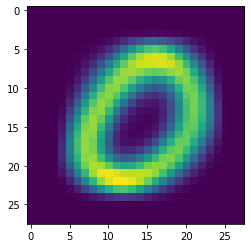

In [29]:
km = KMeans(n_clusters=1)
km.fit(d0_)
new_train_x[:1,:]=km.cluster_centers_
new_train_y=np.append(new_train_y,0)
for cluster in km.cluster_centers_:
    plt.imshow(cluster.reshape(28,28))
    plt.show()

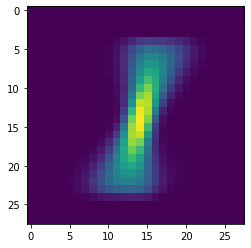

In [30]:
km = KMeans(n_clusters=1)
km.fit(d1_)
new_train_x[1:2,:]=km.cluster_centers_
new_train_y=np.append(new_train_y,1)
for cluster in km.cluster_centers_:
    plt.imshow(cluster.reshape(28,28))
    plt.show()

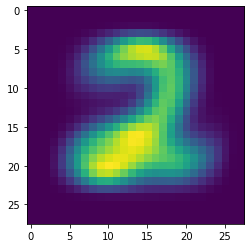

In [31]:
km = KMeans(n_clusters=1)
km.fit(d2_)
new_train_x[2:3,:]=km.cluster_centers_
new_train_y=np.append(new_train_y,2)
for cluster in km.cluster_centers_:
    plt.imshow(cluster.reshape(28,28))
    plt.show()

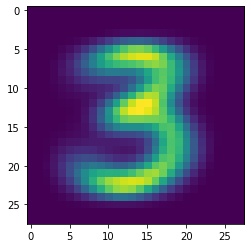

In [32]:
km = KMeans(n_clusters=1)
km.fit(d3_)
new_train_x[3:4,:]=km.cluster_centers_
new_train_y=np.append(new_train_y,3)
for cluster in km.cluster_centers_:
    plt.imshow(cluster.reshape(28,28))
    plt.show()

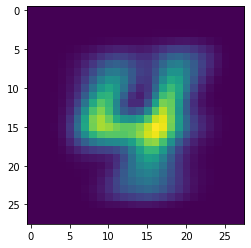

In [33]:
km = KMeans(n_clusters=1)
km.fit(d4_)
new_train_x[4:5,:]=km.cluster_centers_
new_train_y=np.append(new_train_y,4)
for cluster in km.cluster_centers_:
    plt.imshow(cluster.reshape(28,28))
    plt.show()

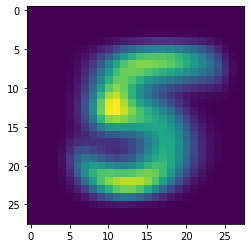

In [34]:
km = KMeans(n_clusters=1)
km.fit(d5_)
new_train_x[5:6,:]=km.cluster_centers_
new_train_y=np.append(new_train_y,5)
for cluster in km.cluster_centers_:
    plt.imshow(cluster.reshape(28,28))
    plt.show()

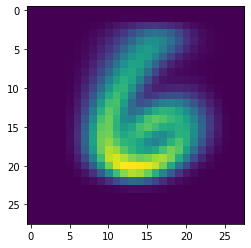

In [35]:
km = KMeans(n_clusters=1)
km.fit(d6_)
new_train_x[6:7,:]=km.cluster_centers_
new_train_y=np.append(new_train_y,6)
for cluster in km.cluster_centers_:
    plt.imshow(cluster.reshape(28,28))
    plt.show()

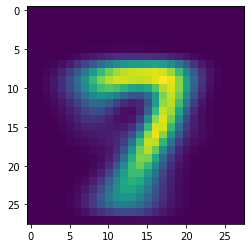

In [36]:
km = KMeans(n_clusters=1)
km.fit(d7_)
new_train_x[7:8,:]=km.cluster_centers_
new_train_y=np.append(new_train_y,7)
for cluster in km.cluster_centers_:
    plt.imshow(cluster.reshape(28,28))
    plt.show()

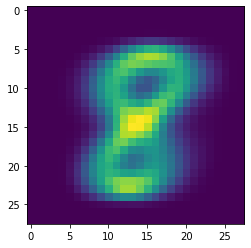

In [37]:
km = KMeans(n_clusters=1)
km.fit(d8_)
new_train_x[8:9,:]=km.cluster_centers_
new_train_y=np.append(new_train_y,8)
for cluster in km.cluster_centers_:
    plt.imshow(cluster.reshape(28,28))
    plt.show()

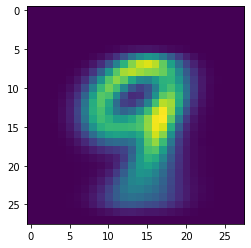

In [38]:
km = KMeans(n_clusters=1)
km.fit(d9_)
new_train_x[9:,:]=km.cluster_centers_
new_train_y=np.append(new_train_y,9)
for cluster in km.cluster_centers_:
    plt.imshow(cluster.reshape(28,28))
    plt.show()

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

best_params = {'neighbors':0, 'weights':'none'}
acc1=0

k_range = range(1,10)
weight_options = ["uniform", "distance"]
for i in k_range:
  for j in weight_options:
    classifier = KNeighborsClassifier(n_neighbors=i,weights=j)
    classifier.fit(new_train_x, new_train_y)
    pred = classifier.predict(test_x_1)
    acc = accuracy_score(pred, test_y)
    print(acc)
    if acc > acc1:
      acc1 = acc
      best_params["neighbors"]=i
      best_params["weights"]=j

0.821
0.821
0.5768
0.821
0.4416
0.821
0.3641
0.821
0.3213
0.821
0.2782
0.821
0.2347
0.821
0.2199
0.821
0.2102
0.821


In [41]:
best_params

{'neighbors': 1, 'weights': 'uniform'}

In [40]:
classifier = KNeighborsClassifier(n_neighbors=best_params['neighbors'], weights=best_params['weights'])
classifier.fit(new_train_x, new_train_y)
pred = classifier.predict(test_x_1)
acc = accuracy_score(pred, test_y)
print(acc)

0.821


In [ ]:
np.save('knn_10_best', new_train_x)

### Решение задачи 3

In [42]:
# ваше решение задачи 3
from sklearn.cluster import KMeans

d0, = np.where(train_y == 0)
d1, = np.where(train_y == 1)
d2, = np.where(train_y == 2)
d3, = np.where(train_y == 3)
d4, = np.where(train_y == 4)
d5, = np.where(train_y == 5)
d6, = np.where(train_y == 6)
d7, = np.where(train_y == 7)
d8, = np.where(train_y == 8)
d9, = np.where(train_y == 9)
d0test, = np.where(test_y == 0)
d1test, = np.where(test_y == 1)
d2test, = np.where(test_y == 2)
d3test, = np.where(test_y == 3)
d4test, = np.where(test_y == 4)
d5test, = np.where(test_y == 5)
d6test, = np.where(test_y == 6)
d7test, = np.where(test_y == 7)
d8test, = np.where(test_y == 8)
d9test, = np.where(test_y == 9)

d0_ = train_x_1[d0]
d1_ = train_x_1[d1]
d2_ = train_x_1[d2]
d3_ = train_x_1[d3]
d4_ = train_x_1[d4]
d5_ = train_x_1[d5]
d6_ = train_x_1[d6]
d7_ = train_x_1[d7]
d8_ = train_x_1[d8]
d9_ = train_x_1[d9]
d0test_ = test_x_1[d0test]
d1test_ = test_x_1[d1test]
d2test_ = test_x_1[d2test]
d3test_ = test_x_1[d3test]
d4test_ = test_x_1[d4test]
d5test_ = test_x_1[d5test]
d6test_ = test_x_1[d6test]
d7test_ = test_x_1[d7test]
d8test_ = test_x_1[d8test]
d9test_ = test_x_1[d9test]

d0_=np.concatenate((d0_, d0test_), axis=0)
d1_=np.concatenate((d1_, d1test_), axis=0)
d2_=np.concatenate((d2_, d2test_), axis=0)
d3_=np.concatenate((d3_, d3test_), axis=0)
d4_=np.concatenate((d4_, d4test_), axis=0)
d5_=np.concatenate((d5_, d5test_), axis=0)
d6_=np.concatenate((d6_, d6test_), axis=0)
d7_=np.concatenate((d7_, d7test_), axis=0)
d8_=np.concatenate((d8_, d8test_), axis=0)
d9_=np.concatenate((d9_, d9test_), axis=0)

In [58]:
print(d0_.shape,d1_.shape,d2_.shape,d3_.shape,d4_.shape,d5_.shape,d6_.shape,d7_.shape,d8_.shape,d9_.shape)

(6903, 784) (7877, 784) (6990, 784) (7141, 784) (6824, 784) (6313, 784) (6876, 784) (7293, 784) (6825, 784) (6958, 784)


In [83]:
new_train_x = np.zeros([100,784])
new_train_y = np.array([])
Nclusters=10

In [84]:
km = KMeans(n_clusters=Nclusters)
km.fit(d0_)
for i,el in enumerate(km.cluster_centers_): 
  new_train_x[i:i+1,:]=el
  new_train_y=np.append(new_train_y,0)

In [85]:
km = KMeans(n_clusters=Nclusters)
km.fit(d1_)
for i,el in enumerate(km.cluster_centers_): 
  new_train_x[i+10:i+11,:]=el
  new_train_y=np.append(new_train_y,1)

In [86]:
km = KMeans(n_clusters=Nclusters)
km.fit(d2_)
for i,el in enumerate(km.cluster_centers_): 
  new_train_x[i+20:i+21,:]=el
  new_train_y=np.append(new_train_y,2)

In [87]:
km = KMeans(n_clusters=Nclusters)
km.fit(d3_)
for i,el in enumerate(km.cluster_centers_): 
  new_train_x[i+30:i+31,:]=el
  new_train_y=np.append(new_train_y,3)

In [88]:
km = KMeans(n_clusters=Nclusters)
km.fit(d4_)
for i,el in enumerate(km.cluster_centers_): 
  new_train_x[i+40:i+41,:]=el
  new_train_y=np.append(new_train_y,4)

In [89]:
km = KMeans(n_clusters=Nclusters)
km.fit(d5_)
for i,el in enumerate(km.cluster_centers_): 
  new_train_x[i+50:i+51,:]=el
  new_train_y=np.append(new_train_y,5)

In [90]:
km = KMeans(n_clusters=Nclusters)
km.fit(d6_)
for i,el in enumerate(km.cluster_centers_): 
  new_train_x[i+60:i+61,:]=el
  new_train_y=np.append(new_train_y,6)

In [91]:
km = KMeans(n_clusters=Nclusters)
km.fit(d7_)
for i,el in enumerate(km.cluster_centers_): 
  new_train_x[i+70:i+71,:]=el
  new_train_y=np.append(new_train_y,7)

In [92]:
km = KMeans(n_clusters=Nclusters)
km.fit(d8_)
for i,el in enumerate(km.cluster_centers_): 
  new_train_x[i+80:i+81,:]=el
  new_train_y=np.append(new_train_y,8)

In [93]:
km = KMeans(n_clusters=Nclusters)
km.fit(d9_)
for i,el in enumerate(km.cluster_centers_): 
  new_train_x[i+90:i+91,:]=el
  new_train_y=np.append(new_train_y,9)

In [94]:
print(new_train_x.shape, new_train_y.shape,new_train_y)

(100, 784) (100,) [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 9. 9. 9. 9. 9. 9.
 9. 9. 9. 9.]


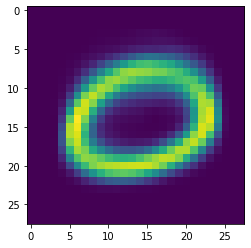

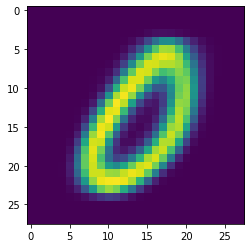

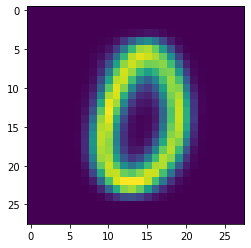

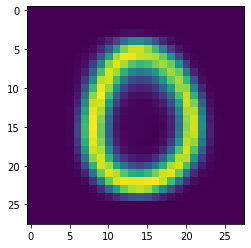

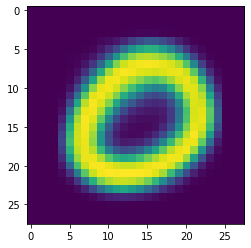

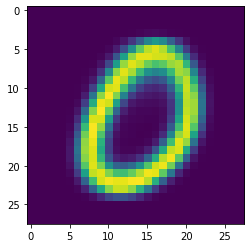

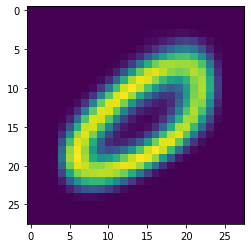

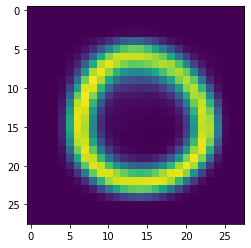

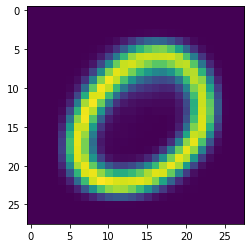

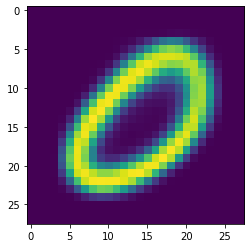

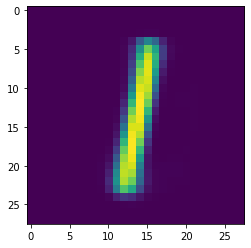

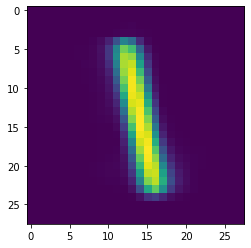

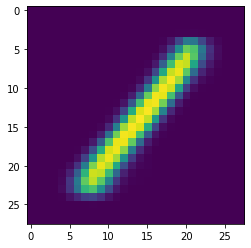

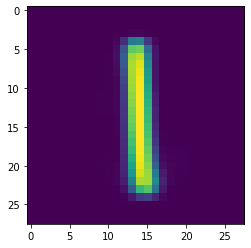

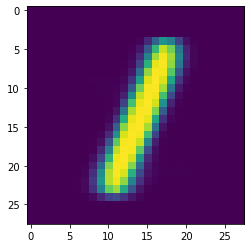

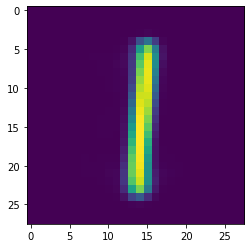

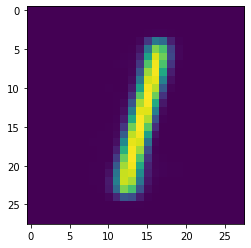

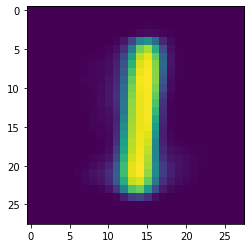

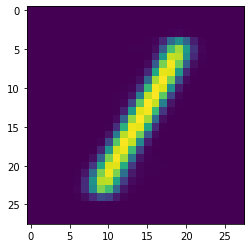

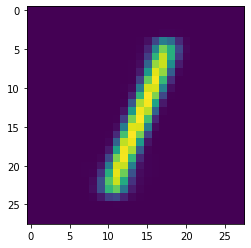

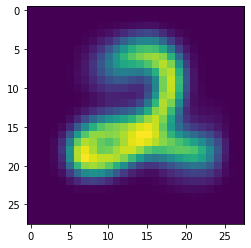

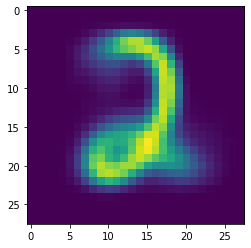

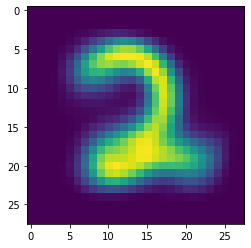

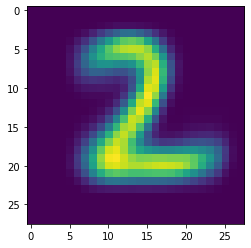

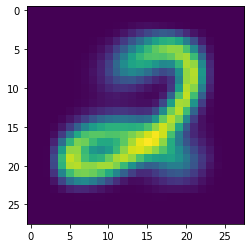

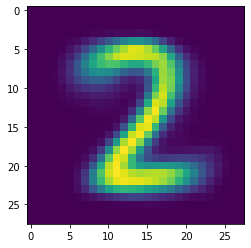

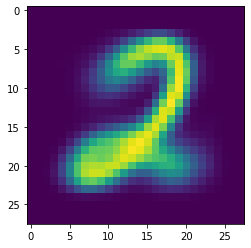

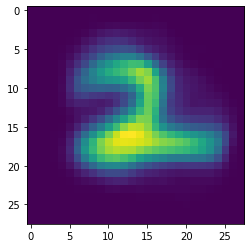

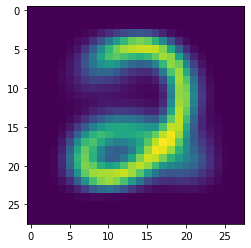

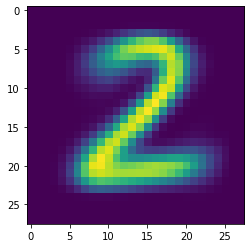

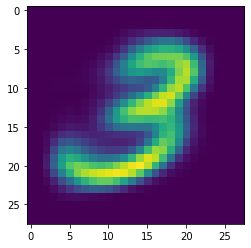

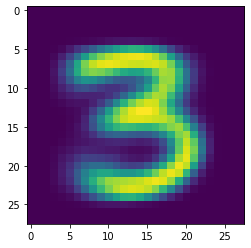

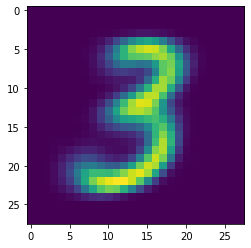

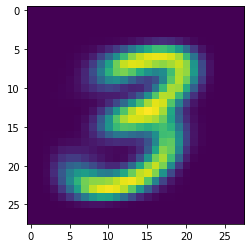

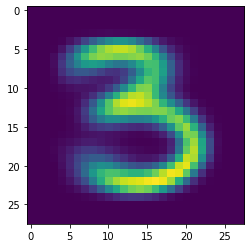

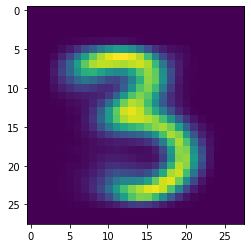

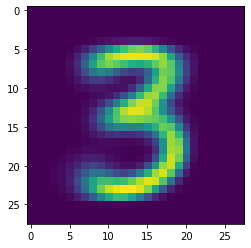

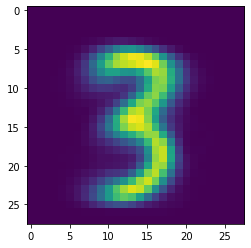

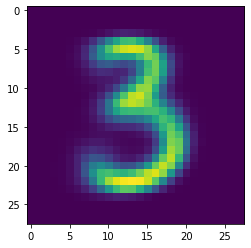

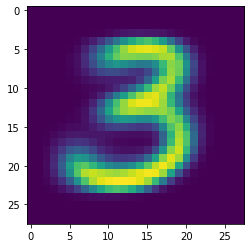

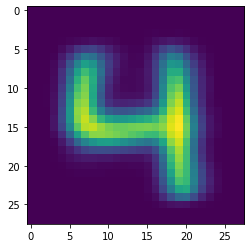

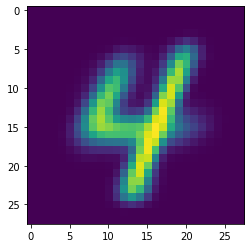

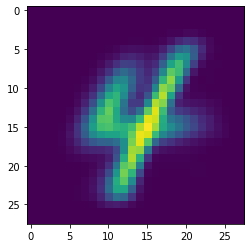

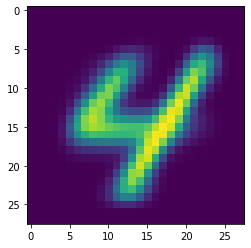

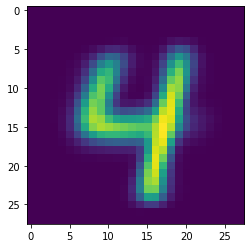

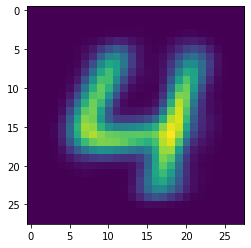

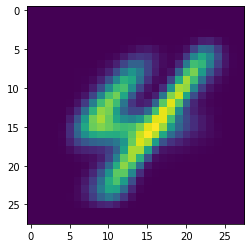

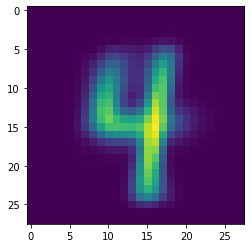

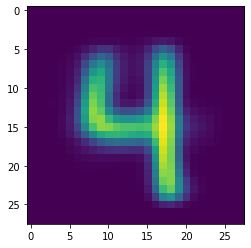

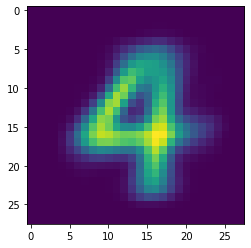

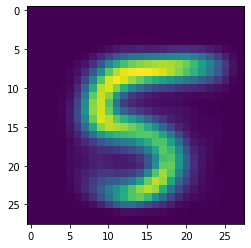

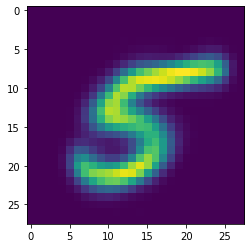

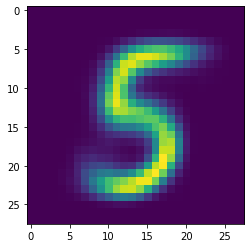

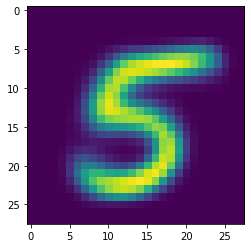

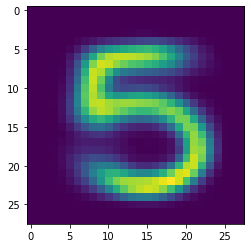

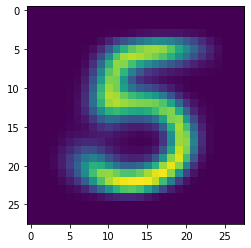

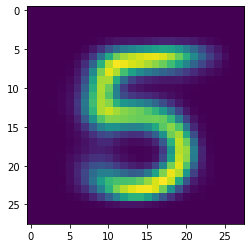

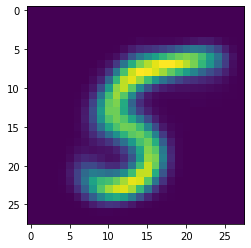

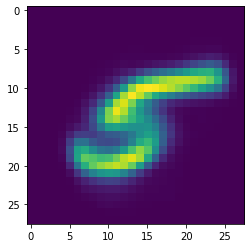

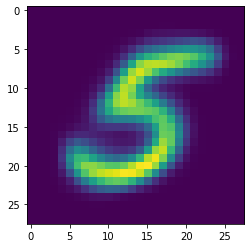

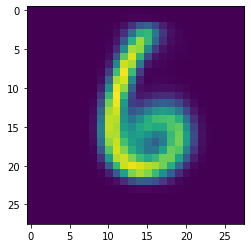

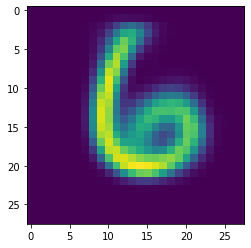

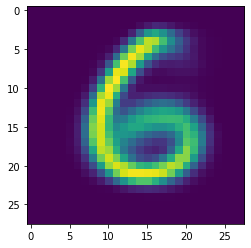

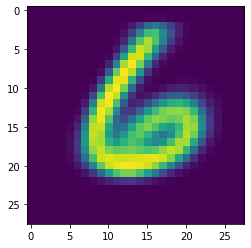

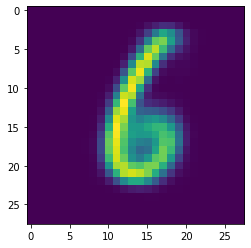

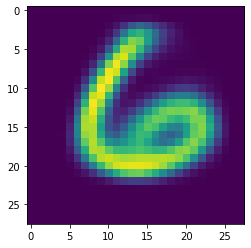

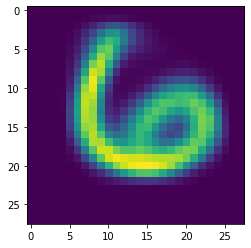

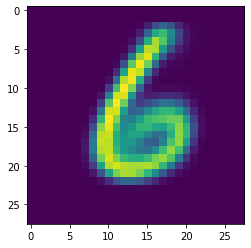

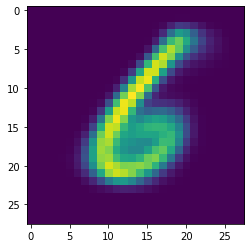

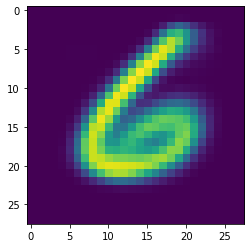

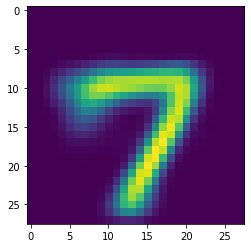

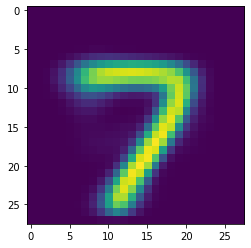

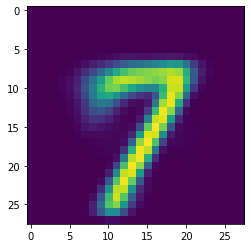

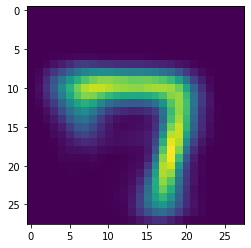

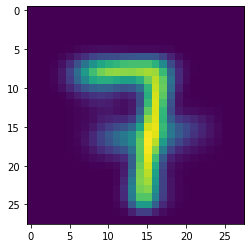

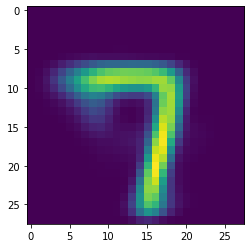

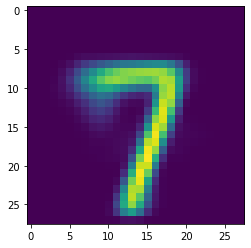

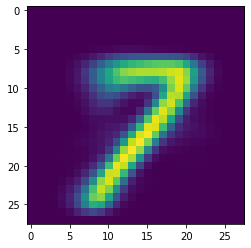

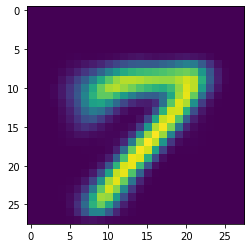

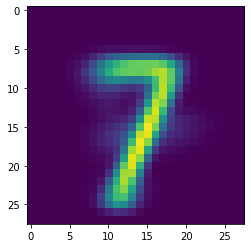

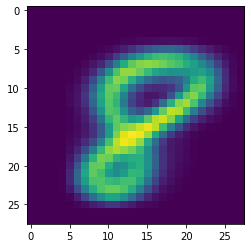

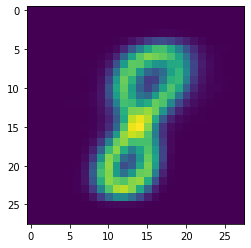

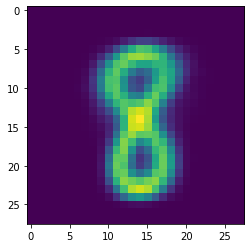

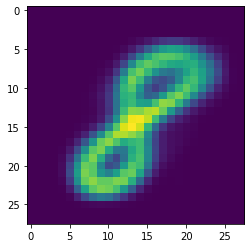

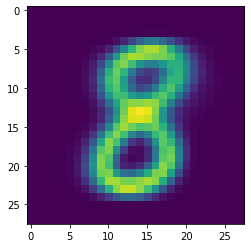

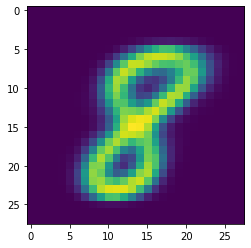

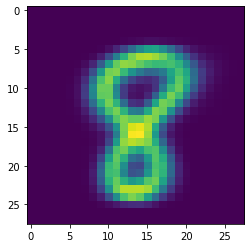

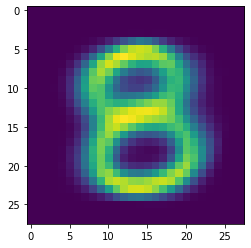

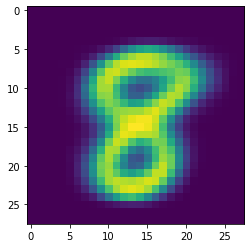

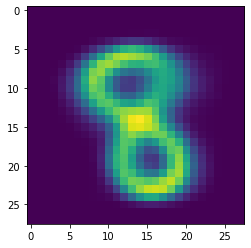

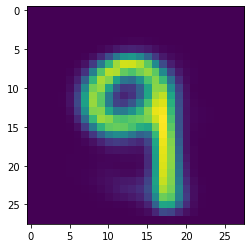

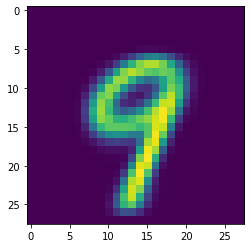

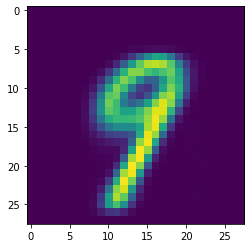

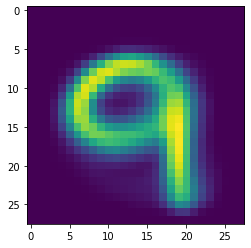

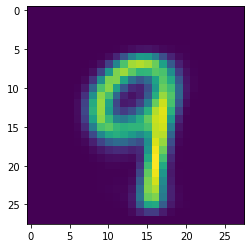

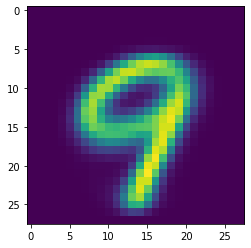

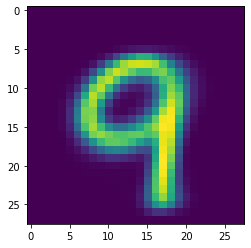

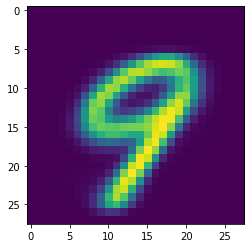

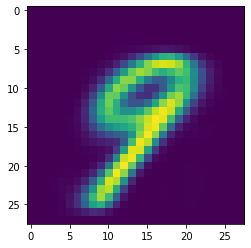

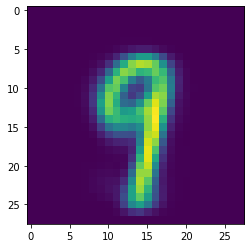

In [95]:
for cluster in new_train_x:
    plt.imshow(cluster.reshape(28,28))
    plt.show()

In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

best_params = {'neighbors':0, 'weights':'none'}
acc1=0

k_range = range(1,25)
weight_options = ["uniform", "distance"]
for i in k_range:
  for j in weight_options:
    classifier = KNeighborsClassifier(n_neighbors=i,weights=j)
    classifier.fit(new_train_x, new_train_y)
    pred = classifier.predict(test_x_1)
    acc = accuracy_score(pred, test_y)
    print(acc)
    if acc > acc1:
      acc1 = acc
      best_params["neighbors"]=i
      best_params["weights"]=j

0.9291
0.9291
0.8554
0.9291
0.8691
0.9046
0.8637
0.9026
0.8509
0.89
0.8418
0.8855
0.8274
0.8728
0.8167
0.8648
0.807
0.8541
0.8019
0.8467
0.7952
0.8401
0.7858
0.8362
0.7764
0.8307
0.7694
0.8221
0.7593
0.8147
0.75
0.807
0.7407
0.7994
0.7319
0.7927
0.7216
0.7855
0.716
0.7808
0.7115
0.777
0.7034
0.7733
0.6967
0.77
0.6935
0.7642


In [97]:
best_params

{'neighbors': 1, 'weights': 'uniform'}

In [98]:
classifier = KNeighborsClassifier(n_neighbors=best_params['neighbors'], weights=best_params['weights'])
classifier.fit(new_train_x, new_train_y)
pred = classifier.predict(test_x_1)
acc = accuracy_score(pred, test_y)
print(acc)

0.9291
